In [1]:
from variational_autoencoder import *

In [2]:
input_shape = (28, 28, 1)
latent_dim = 2

# Get the encoder
encoder = conv_encoder(input_shape, latent_dim)

# Get the decoder
decoder = conv_decoder(img_shape=input_shape, latent_dim=latent_dim, filters=[128, 32])

# Compile the Autoencoder
vae = VAE(encoder, decoder)
vae.compile(optimizer="adam")

In [3]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 14, 14, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 14, 14, 128)  36992       ['max_pooling2d[0][0]']          
                                                                                            

In [4]:
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 6272)              18816     
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      147584    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       36896     
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         289 

In [5]:
# Load the data and fit the model
(x_train, y_train), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
vae.fit(x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 21s 29ms/step - loss: 259.9255 - reconstruction_loss: 215.7570 - kl_loss: 0.8621
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 189.9843 - reconstruction_loss: 187.0523 - kl_loss: 2.1920
Epoch 3/10
469/469 [==============================] - 13s 29ms/step - loss: 184.2431 - reconstruction_loss: 175.9267 - kl_loss: 3.5397
Epoch 4/10
469/469 [==============================] - 14s 29ms/step - loss: 171.0661 - reconstruction_loss: 165.5159 - kl_loss: 4.5334
Epoch 5/10
469/469 [==============================] - 13s 29ms/step - loss: 167.3448 - reconstruction_loss: 162.4566 - kl_loss: 4.7684
Epoch 6/10
469/469 [==============================] - 13s 29ms/step - loss: 165.5482 - reconstruction_loss: 160.3203 - kl_loss: 4.9280
Epoch 7/10
469/469 [==============================] - 13s 29ms/step - loss: 163.6538 - reconstruction_loss: 158.5918 - kl_loss: 5.0778
Epoch 8/10
469/469 [==============================] - 1

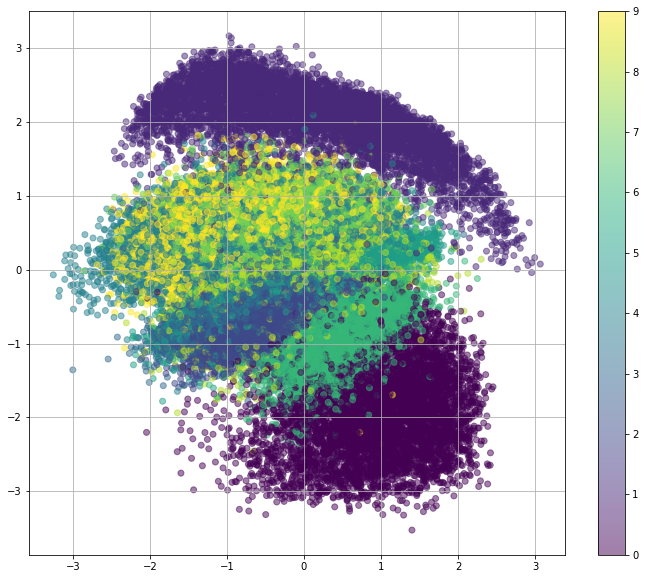

In [6]:
# Get the latent representation and the bounds
latent_space, _, _ = encoder.predict(x_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.scatter(latent_space[:,0], latent_space[:,1], alpha=.5, c=y_train)
plt.colorbar()
plt.grid()
plt.show()

In [7]:
random_indexe = np.random.choice(np.arange(latent_space.shape[0]), size=10)
random_point = latent_space[random_indexe]
# random_point = [[-2, 0], [2, 0]]

new_images = vae.decoder.predict(random_point)
new_images.shape

(10, 28, 28, 1)

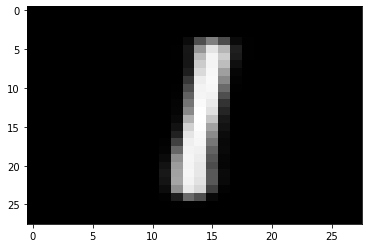

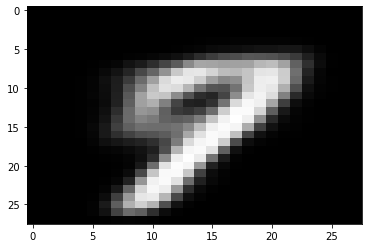

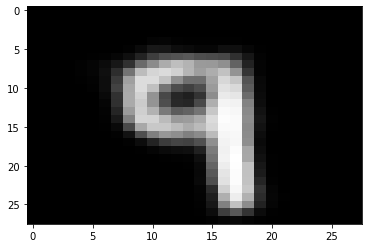

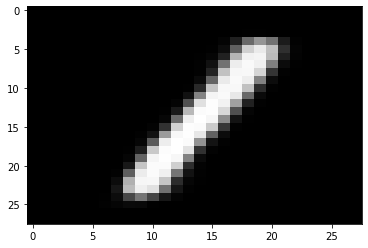

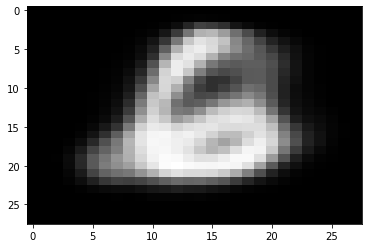

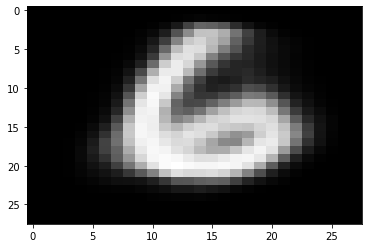

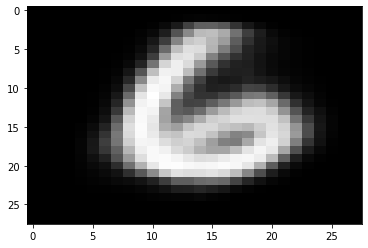

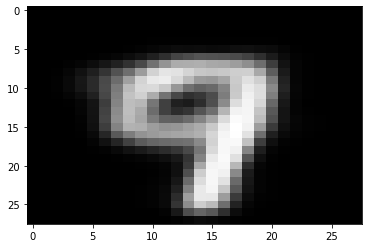

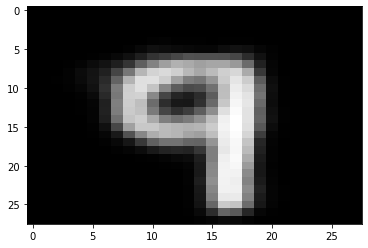

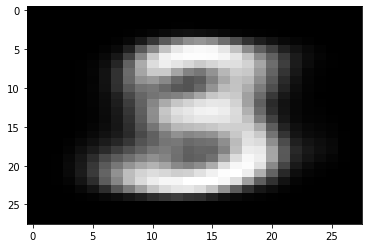

In [8]:
for img in new_images:
    plt.figure()
    plt.imshow(img, aspect="auto", cmap="Greys_r")